### OBJETIVOS
1) como segmentar datos usando k-means clustering 
2) como evaluar y visualizar clusters 
3) como elegir el numero indicado de clusters 
4) como analizar los resultados de kmeans clustering

### TRAER LOS DATOS 

In [36]:
import pandas as pd   
customers = pd.read_csv("Mall_Customers.csv")
customers.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [35]:
customers.columns[3
                  ]

'SpendingScore'

In [37]:
customers.rename(columns={customers.columns[1]:"Gender"}, inplace=True)
customers.rename(columns={customers.columns[3]:"Income"}, inplace=True)
customers.rename(columns={customers.columns[4]:"SpendingScore"}, inplace=True)


### EXPLORACION DE DATOS 

In [38]:
## ver el tipo de datos de cada columna y la cantidad de datos que hay, si hay null o no 
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     200 non-null    int64 
 1   Gender         200 non-null    object
 2   Age            200 non-null    int64 
 3   Income         200 non-null    int64 
 4   SpendingScore  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [39]:
customers.columns

Index(['CustomerID', 'Gender', 'Age', 'Income', 'SpendingScore'], dtype='object')

In [40]:
## ver un pequeño estadistico de lo que tenemos, bastante util 
customers.describe(include="all").round(2)

,CustomerID,Gender,Age,Income,SpendingScore
count,200.00,200,200.00,200.00,200.00
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.50,NaN,38.85,60.56,50.20
std,57.88,NaN,13.97,26.26,25.82
min,1.00,NaN,18.00,15.00,1.00
25%,50.75,NaN,28.75,41.50,34.75
50%,100.50,NaN,36.00,61.50,50.00
75%,150.25,NaN,49.00,78.00,73.00


In [41]:
## Visualizacion de datos, se importan las mejores librerias para el caso 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

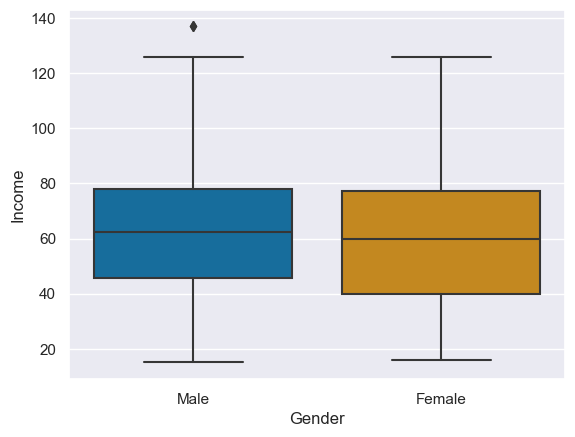

In [42]:
## configuracion de las visualizaciones, comparar las cosas entre male y female por medio de cajas 
## Genero vs Income, no hay alguna diferencia abismal 
ax=sns.boxplot(data= customers, x="Gender", y="Income", palette="colorblind")

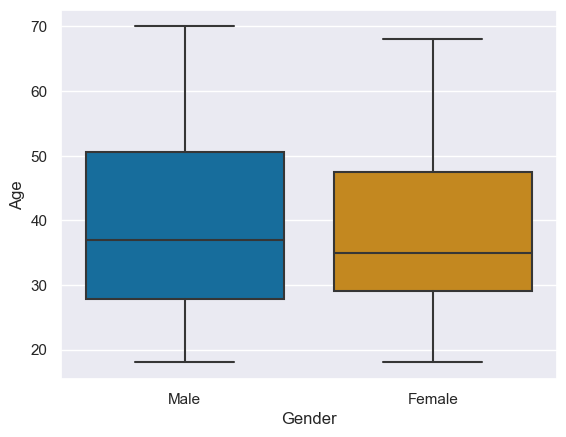

In [43]:
## Gender vs Age, aparentemente similares
ax=sns.boxplot(data= customers, x="Gender", y="Age", palette="colorblind")

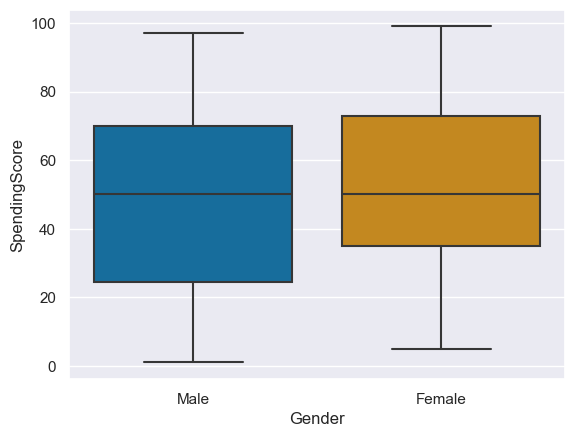

In [44]:
## Gender vs Spending Score, aparentemente similares 
ax=sns.boxplot(data= customers, x="Gender", y="SpendingScore", palette="colorblind")

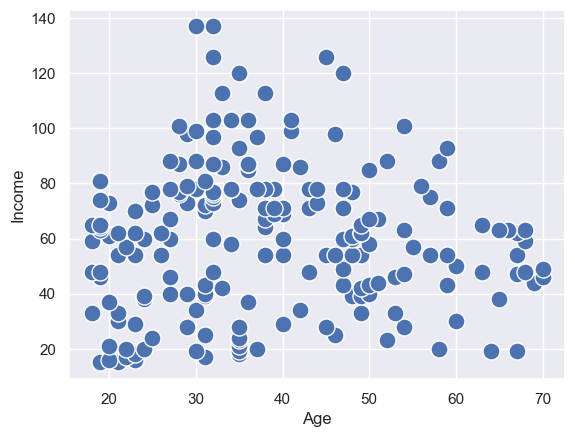

In [45]:
#Age vs Income, leve bajada despues de los 50 
ax=sns.scatterplot(data= customers, x="Age", y="Income", s=150)

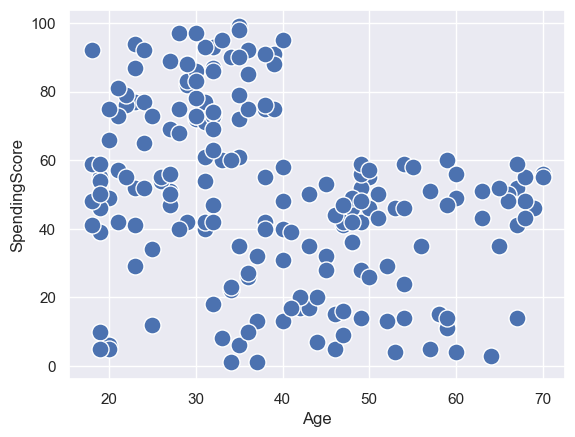

In [46]:
#Age vs Income, aparente relacion despues de los 30
ax=sns.scatterplot(data= customers, x="Age", y="SpendingScore", s=150)

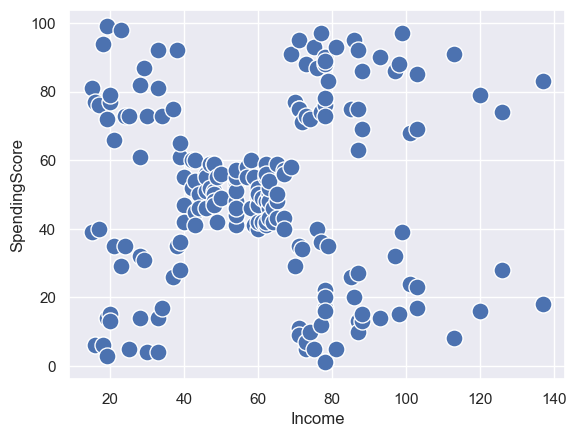

In [47]:
##Income vs Spendig Score, no existe una relacion lineal
ax=sns.scatterplot(data= customers, x="Income", y="SpendingScore", s=150)

### Preparacion de los datos

In [48]:
## se necesita realizar una normalizacion de los datos ya que la desviacion estandar es exagerada
customers[["Income", "SpendingScore"]].describe().round(2)

,Income,SpendingScore
count,200.00,200.00
mean,60.56,50.20
std,26.26,25.82
min,15.00,1.00
25%,41.50,34.75
50%,61.50,50.00
75%,78.00,73.00
max,137.00,99.00


In [49]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [50]:
customer_scaled = scaler.fit_transform(customers[["Income", "SpendingScore"]])

In [51]:
customer_scaled=pd.DataFrame(customer_scaled,columns=["Income","SpendingScore"])

In [53]:
## Normalizacion completada, mediana 0 std 1 
customer_scaled.describe().round(2)

,Income,SpendingScore
count,200.00,200.00
mean,-0.00,-0.00
std,1.00,1.00
min,-1.74,-1.91
25%,-0.73,-0.60
50%,0.04,-0.01
75%,0.67,0.89
max,2.92,1.89


In [58]:
customer_scaled

,Income,SpendingScore
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980
...,...,...
195,2.268791,1.118061
196,2.497807,-0.861839
197,2.497807,0.923953
198,2.917671,-1.250054


### Crear los "Clusters"

In [56]:
from sklearn.cluster import KMeans
## n_clusters es k, n_init numero de veces que se debe ejecutar con diferentes semillas centrales (establecido10)
Km=KMeans(n_clusters=3,n_init=25,random_state=1234)

In [59]:
Km.fit(customer_scaled)

KMeans(n_clusters=3, n_init=25, random_state=1234)

In [60]:
Km.labels_ ## el primero corresponde al cluster 0, mientras que el ultimo al 2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [61]:
Km.inertia_ ##suma total de minimos cuadrados dentro del cluster 

157.70400815035947

### Visualizacion de Clusters

In [63]:
## Evaluacion de la calidad de los clusters, si es mas grande o mas pequeño que el resto
## necesitara mas atencion 
pd.Series(Km.labels_).value_counts().sort_index()

0    123
1     38
2     39
dtype: int64

In [64]:
## Vamos a obtener las coordenadas de los centroides 
Km.cluster_centers_

array([[-0.62618966, -0.01439238],
       [ 1.00919971, -1.22553537],
       [ 0.99158305,  1.23950275]])

In [65]:
## se crea un dataframe para interpretar los cluster de forma mas facil 
cluster_centers = pd.DataFrame(Km.cluster_centers_,columns=["Income","SpendingScore"])
cluster_centers

,Income,SpendingScore
0,-0.626190,-0.014392
1,1.009200,-1.225535
2,0.991583,1.239503


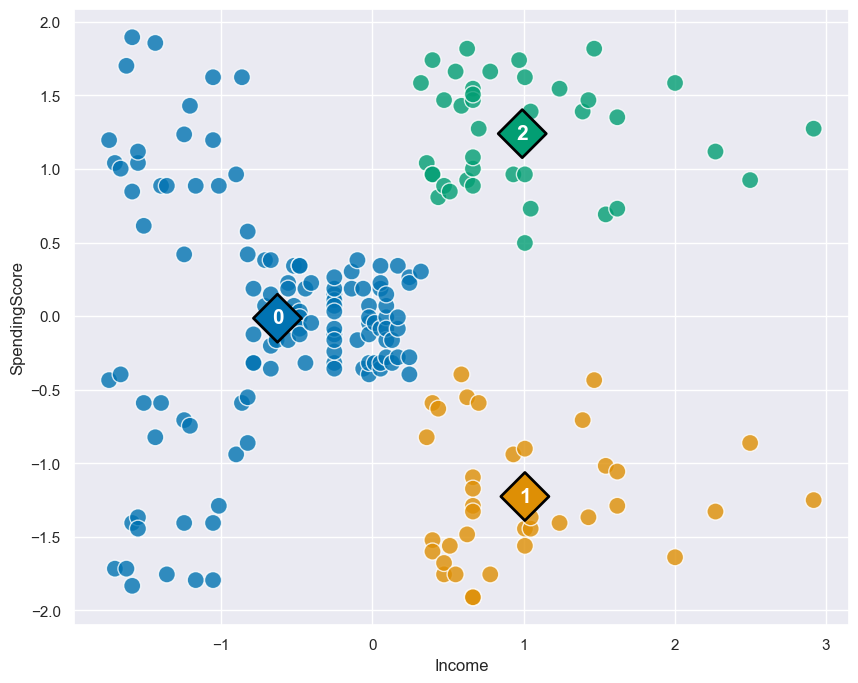

In [71]:
## Confiurar el tamaño de la figura
plt.figure(figsize=(10,8))
## Plot the clusters
ax = sns.scatterplot(
    data= customer_scaled,
    x="Income",
    y="SpendingScore",
    hue= Km.labels_ ,
    palette="colorblind",
    alpha=0.8,
    s=150,
    legend=False
)

##Centroides

ax = sns.scatterplot(
    data= cluster_centers,
    x="Income",
    y="SpendingScore",
    hue= cluster_centers.index ,
    palette="colorblind",
    s=600,
    marker="D",
    ec="black",
    legend=False
)

##etiquetas de los centroides

for i in range(len(cluster_centers)):
    plt.text(x=cluster_centers.Income[i],
             y=cluster_centers.SpendingScore[i],
             s=i,
             horizontalalignment="center",
             verticalalignment="center",
             size=15,
             weight="bold",
             color="white")



### Elegir el numero de clusters correctamente !!

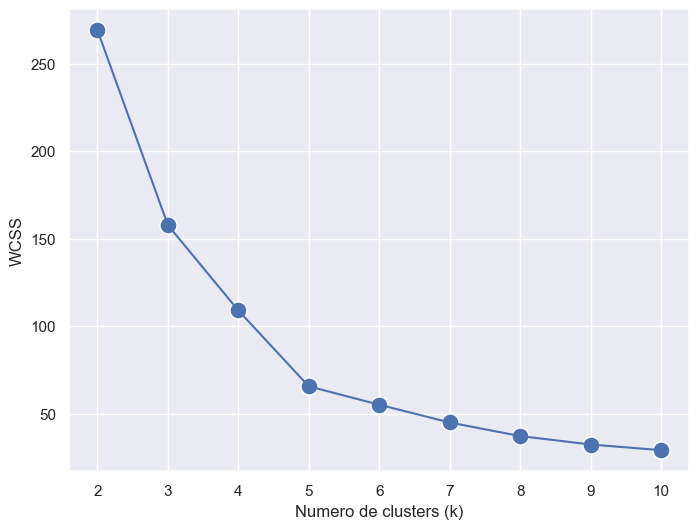

In [73]:
## Metodos minimos cuadrados, segun esto serian 5 
wcss=[]
for k in range(2,11):
    Km=KMeans(n_clusters=k, n_init=25, random_state=1234)
    Km.fit(customer_scaled)
    wcss.append(Km.inertia_)

wcss_series=pd.Series(wcss,index=range(2,11))
plt.figure(figsize=(8,6))
ax=sns.lineplot(y=wcss_series,x=wcss_series.index)
ax=sns.scatterplot(y=wcss_series,x=wcss_series.index,s=150)
ax=ax.set(xlabel="Numero de clusters (k)",ylabel="WCSS")

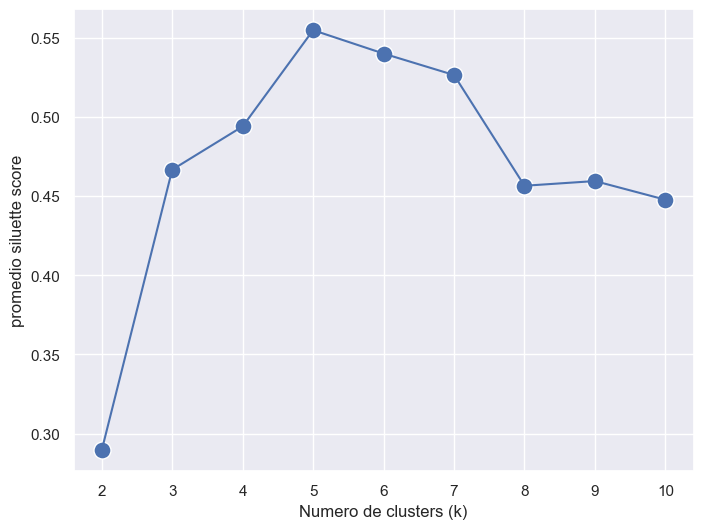

In [74]:
### The avarage Silhoutte Score , tambien dice que 5 
from sklearn.metrics import silhouette_score as SS
sil=[]
for k in range(2,11):
    Km=KMeans(n_clusters=k, n_init=25, random_state=1234)
    Km.fit(customer_scaled)
    sil.append(SS(customer_scaled,Km.labels_))

silhoutee_series=pd.Series(sil,index=range(2,11))
plt.figure(figsize=(8,6))
ax=sns.lineplot(y=silhoutee_series,x=silhoutee_series.index)
ax=sns.scatterplot(y=silhoutee_series,x=silhoutee_series.index,s=150)
ax=ax.set(xlabel="Numero de clusters (k)",ylabel="promedio siluette score")

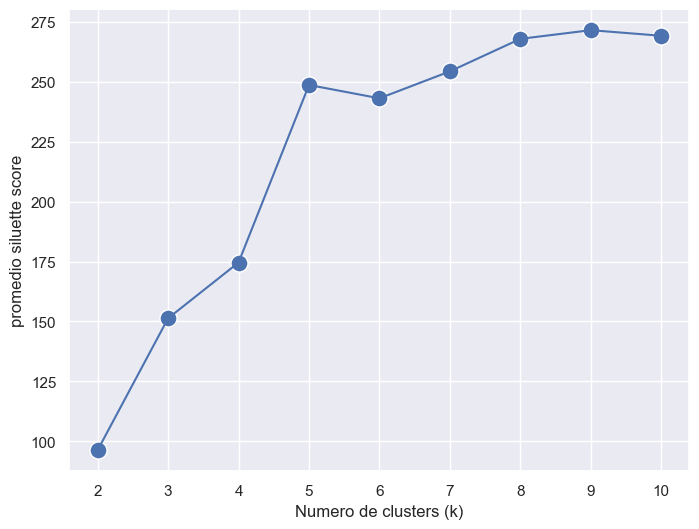

In [75]:
### The Calinski Harazab Score , tambien 5 
from sklearn.metrics import calinski_harabasz_score as ch

calinski=[]
for k in range(2,11):
    Km=KMeans(n_clusters=k, n_init=25, random_state=1234)
    Km.fit(customer_scaled)
    calinski.append(ch(customer_scaled,Km.labels_))

calinski_series=pd.Series(calinski,index=range(2,11))
plt.figure(figsize=(8,6))
ax=sns.lineplot(y=calinski_series,x=calinski_series.index)
ax=sns.scatterplot(y=calinski_series,x=calinski_series.index,s=150)
ax=ax.set(xlabel="Numero de clusters (k)",ylabel="promedio siluette score")


### Analizar e interpretar los clusters 

In [76]:
Km2=KMeans(n_clusters=5,n_init=25,random_state=1234)
Km2.fit(customer_scaled)

KMeans(n_clusters=5, n_init=25, random_state=1234)

In [77]:
cluster_centers2=pd.DataFrame(Km2.cluster_centers_,columns=["Income","SpendingScore"])

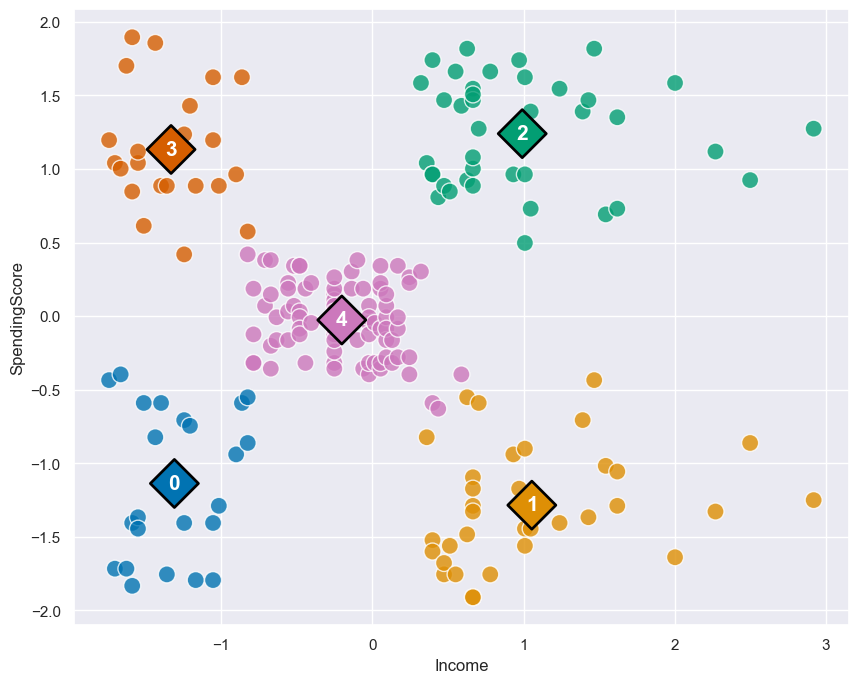

In [79]:
## Confiurar el tamaño de la figura
plt.figure(figsize=(10,8))
## Plot the clusters
ax = sns.scatterplot(
    data= customer_scaled,
    x="Income",
    y="SpendingScore",
    hue= Km2.labels_ ,
    palette="colorblind",
    alpha=0.8,
    s=150,
    legend=False
)

##Centroides

ax = sns.scatterplot(
    data= cluster_centers2,
    x="Income",
    y="SpendingScore",
    hue= cluster_centers2.index ,
    palette="colorblind",
    s=600,
    marker="D",
    ec="black",
    legend=False
)

##etiquetas de los centroides

for i in range(len(cluster_centers2)):
    plt.text(x=cluster_centers2.Income[i],
             y=cluster_centers2.SpendingScore[i],
             s=i,
             horizontalalignment="center",
             verticalalignment="center",
             size=15,
             weight="bold",
             color="white")

In [80]:
##Asignar cada cluster a cada datooo!!!
customers["Cluster"]=Km2.labels_.tolist()
customers.head(10)

,CustomerID,Gender,Age,Income,SpendingScore,Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,3
2,3,Female,20,16,6,0
3,4,Female,23,16,77,3
4,5,Female,31,17,40,0
5,6,Female,22,17,76,3
6,7,Female,35,18,6,0
7,8,Female,23,18,94,3
8,9,Male,64,19,3,0
9,10,Female,30,19,72,3


In [81]:
## Volvemos binario la columna genero 
customers=pd.get_dummies(customers,columns=["Gender"])
customers.head(10)

,CustomerID,Age,Income,SpendingScore,Cluster,Gender_Female,Gender_Male
0,1,19,15,39,0,0,1
1,2,21,15,81,3,0,1
2,3,20,16,6,0,1,0
3,4,23,16,77,3,1,0
4,5,31,17,40,0,1,0
5,6,22,17,76,3,1,0
6,7,35,18,6,0,1,0
7,8,23,18,94,3,1,0
8,9,64,19,3,0,0,1
9,10,30,19,72,3,1,0


In [82]:
customers.agg({"Gender_Female":"mean","Gender_Male":"mean","Age":"median","Income":"median","SpendingScore":"median"}).round(2)

Gender_Female     0.56
Gender_Male       0.44
Age              36.00
Income           61.50
SpendingScore    50.00
dtype: float64

In [83]:
customers.groupby("Cluster").agg({"Gender_Female":"mean","Gender_Male":"mean","Age":"median","Income":"median","SpendingScore":"median"}).round(2)

,Gender_Female,Gender_Male,Age,Income,SpendingScore
Cluster,,,,,
0,0.61,0.39,46.0,25.0,17.0
1,0.46,0.54,42.0,85.0,16.0
2,0.54,0.46,32.0,79.0,83.0
3,0.59,0.41,23.5,24.5,77.0
4,0.59,0.41,46.0,54.0,50.0
